In [120]:
import pandas as pd
import matplotlib.pyplot as plt
import math
import numpy as np
import seaborn as sns;

from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from sklearn import cross_validation

from sklearn import linear_model
from sklearn import preprocessing 
%matplotlib inline

In [124]:
# cut -d " " -f2 dataset/header.txt | grep -v DATA | grep -v income | sed 's/.*/"&",/' | paste -s -d ' '

In [121]:
original_data = pd.read_csv("dataset/census-income_1K.data", 
                            names=["age","detailed_occupation_recode","education","wage_per_hour",
                                   "enroll_in_edu_inst_last_wk","marital_stat","major_industry_code", 
                                   "major_occupation_code","race","hispanic_origin","sex", 
                                   "member_of_a_labor_union","reason_for_unemployment", 
                                   "full_or_part_time_employment_stat", "capital_gains", "capital_losses",
                                   "dividends_from_stocks","tax_filer_stat","region_of_previous_residence", 
                                   "state_of_previous_residence","detailed_household_and_family_stat", 
                                   "detailed_household_summary_in_household","instance_weight", 
                                   "migration_code−change_in_msa","migration_code−change_in_reg", 
                                   "migration_code−move_within_reg","live_in_this_house_1_year_ago", 
                                   "migration_prev_res_in_sunbelt","num_persons_worked_for_employer", 
                                   "family_members_under_18","country_of_birth_father","country_of_birth_mother",
                                   "country_of_birth_self","citizenship","own_business_or_self_employed", 
                                   "fill_inc_questionnaire_for_veterans_admin","veterans_benefits", 
                                   "weeks_worked_in_year","year","class"], 
                            sep=',', 
                            engine='python', 
                            na_values="?")

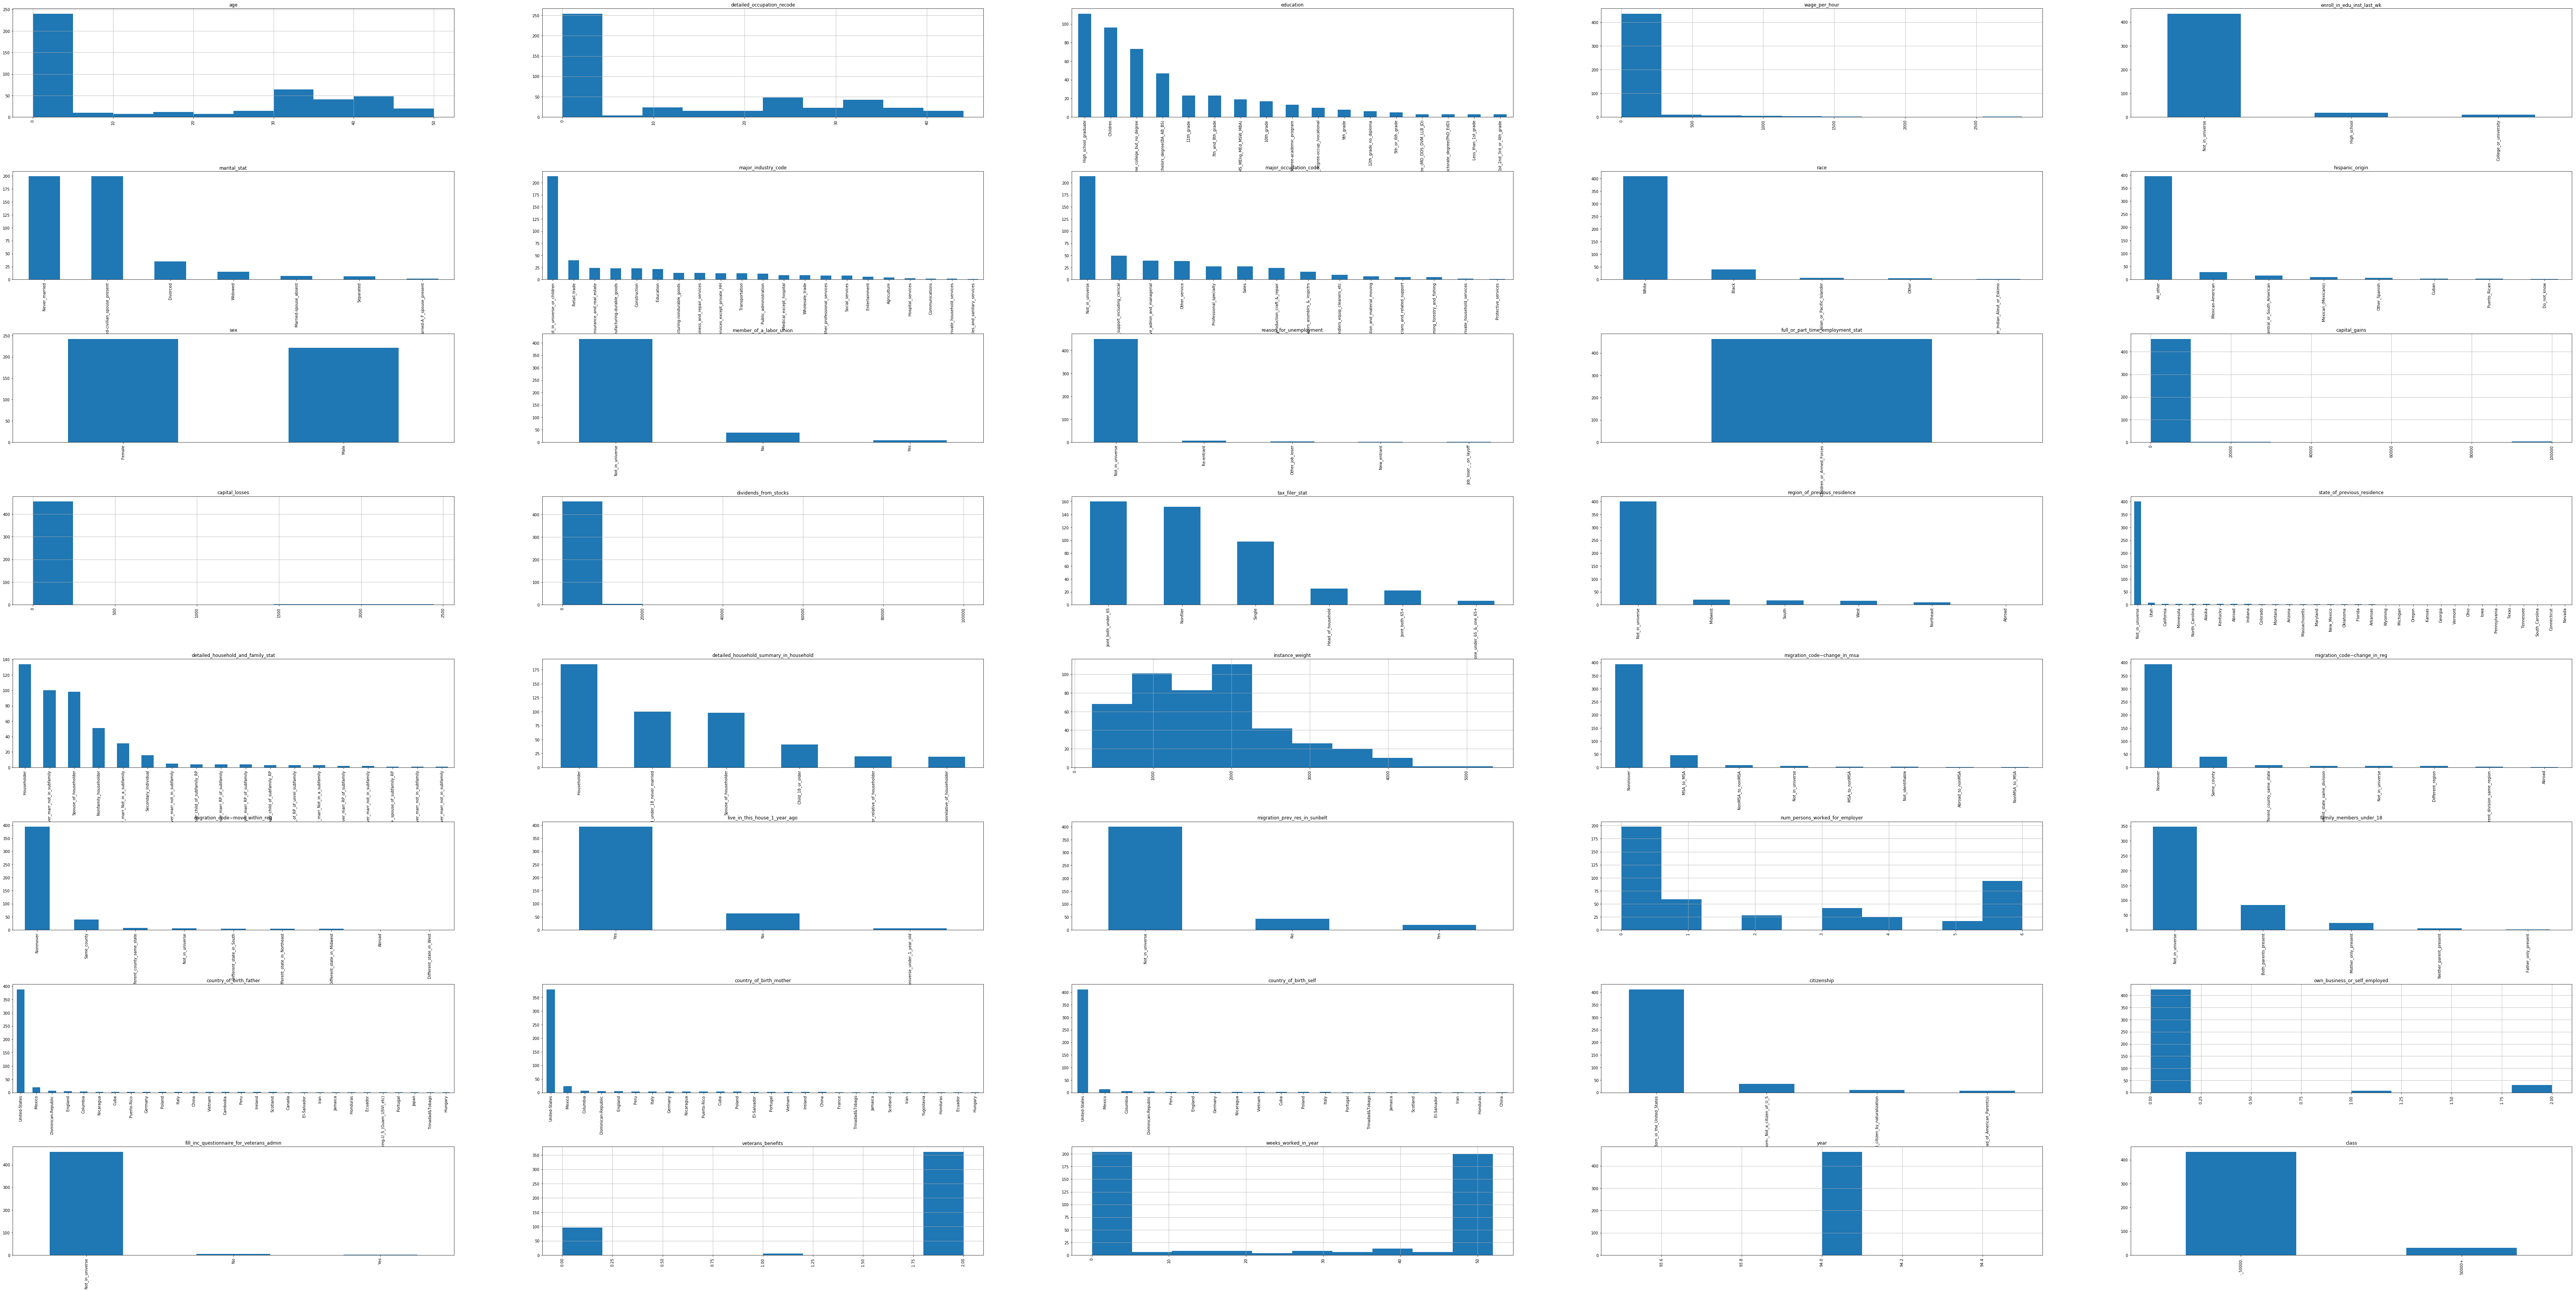

In [103]:
fig = plt.figure(figsize=(120,60))
cols = 5
rows = np.ceil(float(original_data.shape[1])/cols)
for i, column in enumerate(original_data.columns):
    ax = fig.add_subplot(rows, cols, i+1)
    ax.set_title(column)
    if original_data.dtypes[column] == np.object:
        original_data[column].value_counts().plot(kind="bar", axes=ax)
    else:
        original_data[column].hist(axes=ax)
        plt.xticks(rotation="vertical")
plt.subplots_adjust(hspace=0.5,wspace=0.2)

In [104]:
def number_encode_features(df):
	result=df.copy()
	encoders={}
	for column in result.columns:
		if result.dtypes[column]==np.object:
			encoders[column]=preprocessing.LabelEncoder()
			result[column]=encoders[column].fit_transform(
				result[column])
	return result,encoders

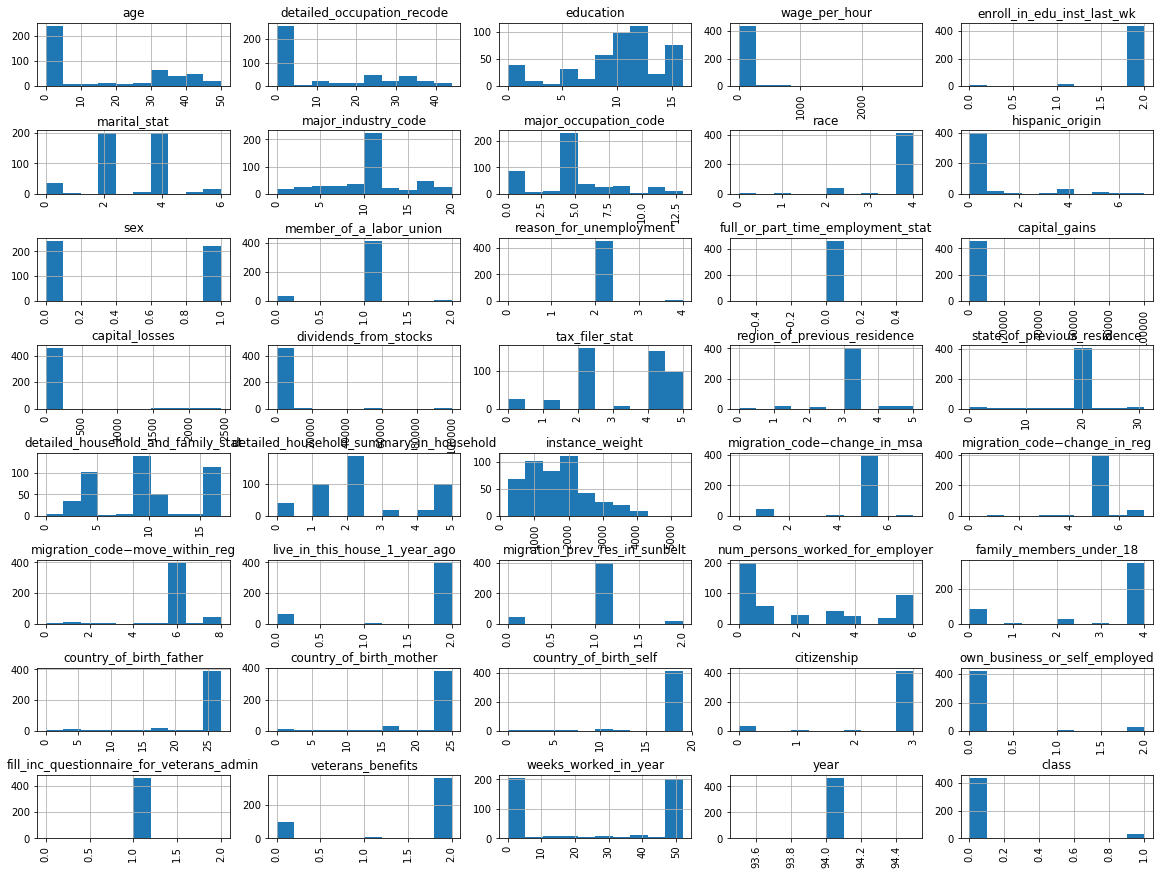

In [105]:
encoded_data, encoders = number_encode_features(original_data)
fig = plt.figure(figsize=(20,15))
cols = 5
rows = np.ceil(float(encoded_data.shape[1])/cols)
for i, column in enumerate (encoded_data.columns):
    ax = fig.add_subplot(rows, cols, i + 1)
    ax.set_title(column)
    encoded_data[column].hist(axes=ax)
    plt.xticks(rotation="vertical")
plt.subplots_adjust(hspace=0.7, wspace=0.2)

In [106]:
X_train, X_test, y_train, y_test = cross_validation.train_test_split(encoded_data[encoded_data.columns.difference(
            ["class"])],encoded_data["class"],train_size=0.70)
scaler = preprocessing.StandardScaler()

In [111]:
X_train = pd.DataFrame(scaler.fit_transform(X_train.astype("float64")),columns=X_train.columns)
X_test = scaler.transform(X_test.astype("float64"))

F1score:0.428571


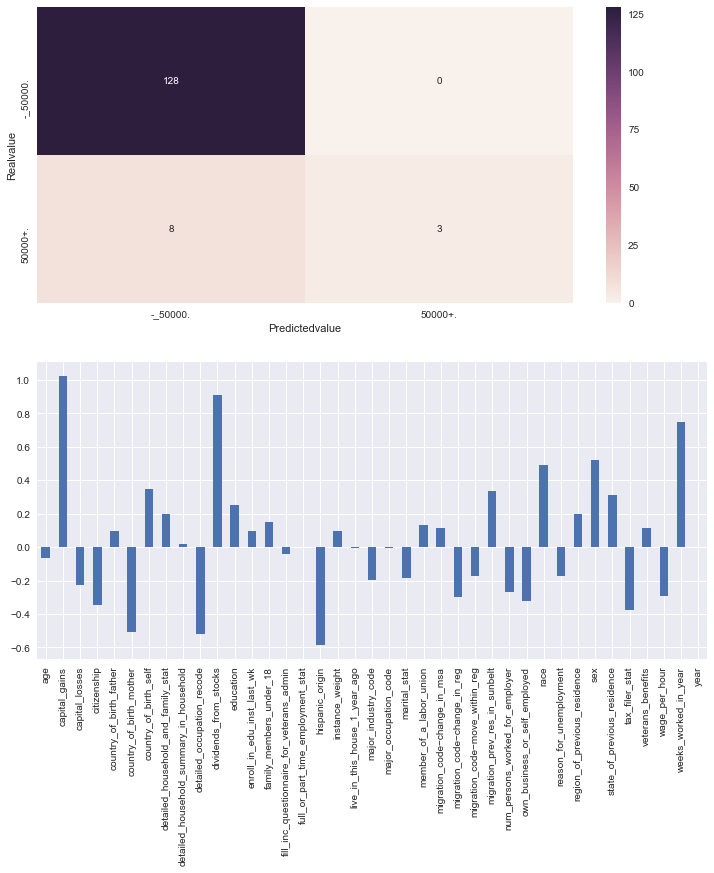

In [123]:
cls = linear_model.LogisticRegression()
cls.fit(X_train,y_train)
y_pred = cls.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(12,12))
plt.subplot(2,1,1)
sns.heatmap(cm, annot=True, 
            fmt="d", 
            xticklabels=encoders["class"].classes_, 
            yticklabels=encoders["class"].classes_)
plt.ylabel("Realvalue")
plt.xlabel("Predictedvalue")
print("F1score:%f" % f1_score(y_test, y_pred))
coefs = pd.Series(cls.coef_[0],index=X_train.columns)
# coefs.sort()
coefs.sort_values()
plt.subplot(2,1,2)
coefs.plot(kind="bar")
plt.show()